In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import ipywidgets as widgets
from IPython.display import display,Markdown

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline
plt.style.use('seaborn-whitegrid')

# No Show Appointments Data Set

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.

Data Dictionary taken from [Kaggle](https://www.kaggle.com/joniarroba/noshowappointments/home)

PatientId - Identification of a patient <br>
AppointmentID - Identification of each appointment <br>
Gender = Male or Female. Female is the greater proportion, woman takes way more care of they health in comparison to man.<br>
DataMarcacaoConsulta (ScheduledDay) = The day of the actuall appointment, when they have to visit the doctor. <br>
DataAgendamento (AppointmentDay) = The day someone called or registered the appointment, this is before appointment of course.<br> 
Age = How old is the patient. <br>
Neighbourhood = Where the appointment takes place. <br>
Scholarship = Ture of False <br>
Hipertension = True or False <br>
Diabetes = True or False <br>
Alcoholism = True or False <br>
Handcap = True or False <br>
SMS_received = 1 or more messages sent to the patient. <br>
No-show = True or False. <br>

In [2]:
noshow_df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Assessing the data

In [3]:
#length
len(noshow_df)

110527

In [4]:
#number of columns
len(noshow_df.columns)

14

In [5]:
#check for null columns
noshow_df.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [6]:
#check for duplicates 
len(noshow_df[noshow_df.duplicated() == True])

0

This data is relatively clean. There are no null values in the entire 110527 rows of data and no duplicate values and no null values. 

## Data Cleaning

Now, checking for abnormal data in the data set. I shall check the Gender column to find a scatter of the data. Then the Age column to find any ages above and below a certain range and then the two time columns wil be checked and seperated to ensure better analysis.

#### Changing column names

There are 2 incorrectly named columns. The first thing to do is to change those names


In [7]:
#changing column names 
noshow_df=noshow_df.rename(columns = {'Hipertension':'Hypertension','Handcap':'Handicap'})
noshow_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Check Male to Female Ratio

As mentioned in the [original source](https://www.kaggle.com/joniarroba/noshowappointments/home), there is a higher percentage of females as compared to males. Infact, it is almost double. 


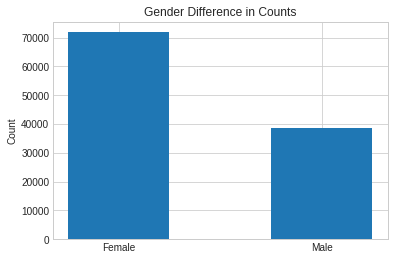

In [8]:
#check male to female ratio 
gender = noshow_df['Gender'].value_counts()
fig, ax = plt.subplots()
index = np.arange(2)
bar_width = 0.5
ax.bar(index, gender, bar_width,)
ax.set_ylabel('Count')
ax.set_title('Gender Difference in Counts')
ax.set_xticks(index)
ax.set_xticklabels(('Female', 'Male'))

plt.show()


#### Check Age
Upon further assessing, it can be seen that there are problems with the age column. The smallest age is -1 and the largest age is 115, both of which are the wrong ages.

In 2017, life expectancy at birth for Brazil was 75.72 years ([here](https://knoema.com/atlas/Brazil/topics/Demographics/Age/Life-expectancy-at-birth)). Hence, any value of age above 95 is going to be excluded from the data along with any value below 0. 0 as a value is being kept to account for infants. 

In [9]:
#check age
ages = noshow_df['Age'].value_counts()
print(ages.sort_values(ascending=True).head())
noshow_df['Age'].describe()

-1      1
 99     1
 102    2
 100    4
 115    5
Name: Age, dtype: int64


count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [10]:
#remove all rows with abnormal age
noshow_df = noshow_df[noshow_df.Age < 95]
corrected_df = noshow_df[noshow_df.Age > -1]
corrected_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
#check data set length
len(corrected_df)

110456

#### Check Scheduled Day and Appointment Day 

I am separating the columns ScheduledDay and AppointmentDay so that it is easier to perform analysis on them and not have to worry about datetime issues.

In [12]:
# disable chained assignments
pd.options.mode.chained_assignment = None 
#convert datetimes into correct formats 
corrected_df['ScheduledDay'] = pd.to_datetime(corrected_df['ScheduledDay'])
corrected_df['AppointmentDay'] = pd.to_datetime(corrected_df['AppointmentDay'])
print(max(corrected_df['ScheduledDay'] ), min(corrected_df['ScheduledDay'] ))

corrected_df.head()

2016-06-08 20:07:23 2015-11-10 07:13:56


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
#Separate scheduled day and appointment day columns
#convert Scheduled day 
corrected_df['ScheduledYear'] = corrected_df['ScheduledDay'].dt.year
corrected_df['ScheduledMonth'] = corrected_df['ScheduledDay'].dt.month 
corrected_df['ScheduledDate'] = corrected_df['ScheduledDay'].dt.day
corrected_df['ScheduledWeekDay'] = corrected_df['ScheduledDay'].dt.day_name()
corrected_df['ScheduledDay'] = corrected_df['ScheduledDay'].dt.date
corrected_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledYear,ScheduledMonth,ScheduledDate,ScheduledWeekDay
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,29,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,29,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,29,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,29,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,29,Friday


In [14]:
#convert AppointmentDay
corrected_df['AppointmentYear'] = corrected_df['AppointmentDay'].dt.year
corrected_df['AppointmentdMonth'] = corrected_df['AppointmentDay'].dt.month
corrected_df['AppointmentDate'] = corrected_df['AppointmentDay'].dt.day
corrected_df['AppointmentWeekDay'] = corrected_df['AppointmentDay'].dt.day_name()
corrected_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,...,SMS_received,No-show,ScheduledYear,ScheduledMonth,ScheduledDate,ScheduledWeekDay,AppointmentYear,AppointmentdMonth,AppointmentDate,AppointmentWeekDay
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,...,0,No,2016,4,29,Friday,2016,4,29,Friday
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,...,0,No,2016,4,29,Friday,2016,4,29,Friday
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,...,0,No,2016,4,29,Friday,2016,4,29,Friday
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,...,0,No,2016,4,29,Friday,2016,4,29,Friday
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,...,0,No,2016,4,29,Friday,2016,4,29,Friday


In [15]:
#take columns needed from corrected_df to form the final df to be taken in for analysis.
df = corrected_df.drop(['PatientId','AppointmentID'], axis=1)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledYear,ScheduledMonth,ScheduledDate,ScheduledWeekDay,AppointmentYear,AppointmentdMonth,AppointmentDate,AppointmentWeekDay
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday


# Data Analysis

There are numerous questions I can ask about this data such as: <br>
>-  What is the age of patients who make it to the appointment? What is the age who does not make it to the appointment?
>-  How many patients who recived the SMS showed up? How many did not show up even after recieving the SMS?
>-  What are the most popular days of visiting the hospital? 
>-  Has the number of people visiting each year increased or decreased? 
>-  How many scholarship students have visited the hospital? 
>-  What are the neighbornoods who visit the doctor ans what are those who dont?
>-  What are the trends of Hypertension, Diabetes, Alcoholism and Handicap in the data?

Each of these questions will be analysed separately below:<br>
__Question 1__:  What is the age of patients who make it to the appointment? What is the age who does not make it to the appointment?

In [16]:
age_show = df[df['No-show'] == 'No']['Age']
age_noshow = df[df['No-show'] == 'Yes']['Age']

mean_show = age_show.mean()
mean_noshow = age_noshow.mean()
print(mean_show)
print(mean_noshow)

37.752070334656835
34.279252219133866


<function matplotlib.pyplot.show(*args, **kw)>

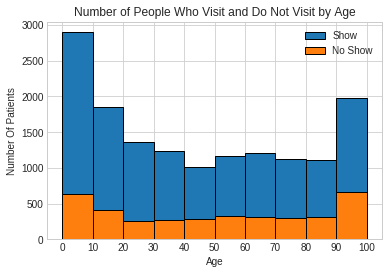

In [17]:
plt.hist(age_show, edgecolor='black', linewidth=1.0, bins=range(11))
plt.hist(age_noshow, edgecolor='black', linewidth=1.0, bins=range(11))
plt.xlabel('Age')
plt.ylabel('Number Of Patients')
plt.title('Number of People Who Visit and Do Not Visit by Age')
plt.legend(['Show','No Show'])
plt.xticks(range(11), ('0','10','20','30','40','50','60','70','80','90','100'))
plt.show

Separating the ages of the patients who visit and patients who do not visit gives two lists. Finding the means of the two list shows us that the mean age of people who visit is 37.75 while the mean age of people who do not show is 34.27. Apart from indicating that the mean age of the no shows is smaller, there is not much information yeilded from this. However, upon visualising the data, we can see some main things:
>-  The number of people who showed is vastly greater than the number of people who do not in all ages. 
>-  The largest number of patients are below 10. Conversely, the largest number of patients not showing up is also below 10
>-  There is an obvious decline in the number of patients as the age increases although the older generation should require more healthcare services. It is only after the age of 90 that we see an stark increase in the number of patients.


__Question 2__:  How many patients who recived the SMS showed up? How many did not show up even after recieving the SMS?

In [18]:
sms_show = df[(df['SMS_received'] > 0) & (df['No-show'] == 'No')]
sms_noshow = df[(df['SMS_received'] > 0) & (df['No-show'] == 'Yes')]
nosms_show = df[(df['SMS_received'] == 0) & (df['No-show'] == 'No')]
nosms_noshow = df[(df['SMS_received'] == 0) & (df['No-show'] == 'Yes')]

count_sms_show = len(sms_show)
count_sms_noshow = len(sms_noshow)
count_nosms_show = len(nosms_show)
count_nosms_noshow = len(nosms_noshow)

print(count_sms_show)
print(count_sms_noshow)
print(count_nosms_show)
print(count_nosms_noshow)

25690
9781
62460
12525


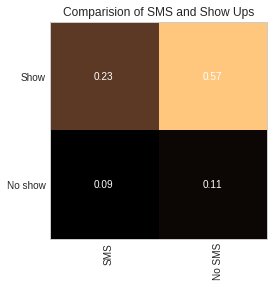

In [19]:
labels_x = ["SMS", "No SMS"]
labels_y = ["Show", "No show"]

total = count_sms_show+count_nosms_show+count_sms_noshow+count_nosms_noshow
vals = np.array([[round(count_sms_show/total,2),
                  round(count_nosms_show/total,2)],
                    [round(count_sms_noshow/total,2),
                     round(count_nosms_noshow/total,2)]])


fig, ax = plt.subplots()
im = ax.imshow(vals,cmap=cm.copper)
ax.set_xticks(np.arange(len(labels_x)))
ax.set_yticks(np.arange(len(labels_y)))
ax.set_xticklabels(labels_x)
ax.set_yticklabels(labels_y)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
         rotation_mode="anchor")
plt.grid(False)
# Loop over data dimensions and create text annotations.
for i in range(len(labels_x)):
    for j in range(len(labels_y)):
        text = ax.text(j, i, vals[i, j], ha="center", va="center", color="w")

ax.set_title("Comparision of SMS and Show Ups")
plt.show()

The proportion of these variables are to be analysed. I can see that a majority number of patients went for their appointments even though they did not get receive SMS conformation and out of the 0.31 of those who did receive SMS confirmation a majority of the people went for thier appointments. 
There's less then 1% of the patients who received no confirmation and did not show up. 

As a result, I think that, for the most part, a lack of SMS confirmation was not the reason that many skipped thier appointments as it can be seen that 0.57 of the sample recieved no sms confirmation but still showed up for their appointments

__Question 3__:  What are the most popular days of visiting the hospital? 

In [20]:
sun_show = df[(df['ScheduledWeekDay'] == 'Sunday') & (df['No-show'] == 'No')]
mon_show = df[(df['ScheduledWeekDay'] == 'Monday') & (df['No-show'] == 'No')]
tue_show = df[(df['ScheduledWeekDay'] == 'Tuesday') & (df['No-show'] == 'No')]
wed_show = df[(df['ScheduledWeekDay'] == 'Wednesday') & (df['No-show'] == 'No')]
thu_show = df[(df['ScheduledWeekDay'] == 'Thursday') & (df['No-show'] == 'No')]
fri_show = df[(df['ScheduledWeekDay'] == 'Friday') & (df['No-show'] == 'No')]
sat_show = df[(df['ScheduledWeekDay'] == 'Saturday') & (df['No-show'] == 'No')]

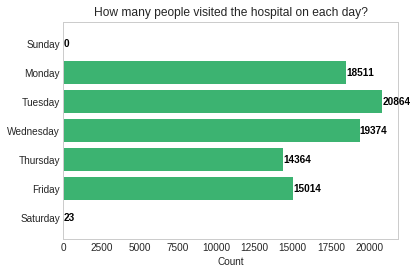

In [21]:
fig, ax = plt.subplots()

days = ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday')
y_pos = np.arange(len(days))
vals = [len(sun_show), len(mon_show), len(tue_show), len(wed_show),
           len(thu_show),len(fri_show), len(sat_show)]

ax.barh(y_pos, vals, align='center',
        color='mediumseagreen', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(days)
ax.invert_yaxis()
ax.set_xlabel('Count')
ax.set_title('How many people visited the hospital on each day?')

#show values of the bars
for i, v in enumerate(vals):
    ax.text(v,i+0.1, str(v), color='black', fontweight='bold')
    
plt.grid(False)
plt.show()

The single coloured horizontal bar graph is pivital to show how the trend of visiting the doctor in Brazil is. It seems as though Saturday and Sundays are holidays in Brazil and almost no one visits the doctor on those days. However, from the remaining 5 days, we can see that Tuesday is the most popular day to visit the doctor followed by Wednesday and Monday. A lower number of patients go in on Thursday and Friday

This question can also be analysed in another way i.e. what dates are the most popular? Do more people visit the doctors on a holiday? Or is it normal working days only when a patient can visit the doctor? This question is analysed along with the next question in the same visualisation.

__Question 4__: Has the number of people visiting each year increased or decreased?

In [22]:
#data 
#only taking Scheduled Columns as that is what is needed for analysis
df_people= df[(df['ScheduledYear'] == 2015)|(df['ScheduledYear'] == 2016)]
print(len(df_people))
df.head()

110456


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,ScheduledYear,ScheduledMonth,ScheduledDate,ScheduledWeekDay,AppointmentYear,AppointmentdMonth,AppointmentDate,AppointmentWeekDay
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016,4,29,Friday,2016,4,29,Friday


In [23]:
#code from https://stackoverflow.com/questions/39258580/ipywidget-with-date-slider
class DateRangePicker(object):
    def __init__(self,start,end,freq='D',fmt='%Y-%m-%d'):
        """
        Parameters
        ----------
        start : string or datetime-like
            Left bound of the period
        end : string or datetime-like
            Left bound of the period
        freq : string or pandas.DateOffset, default='D'
            Frequency strings can have multiples, e.g. '5H' 
        fmt : string, defauly = '%Y-%m-%d'
            Format to use to display the selected period

        """
        self.date_range=pd.date_range(start=start,end=end,freq=freq)
        options = [(item.strftime(fmt),item) for item in self.date_range]
        
        self.slider_start = widgets.SelectionSlider(
            description='Start Date',
            options=options,
            continuous_update=False
        )
        self.slider_end = widgets.SelectionSlider(
            description='End Date',
            options=options,
            continuous_update=False,
            value=options[-1][1]
        )

        self.slider_start.on_trait_change(self.slider_start_changed, 'value')
        self.slider_end.on_trait_change(self.slider_end_changed, 'value')

        self.widget = widgets.Box(children=[self.slider_start,self.slider_end])

    def slider_start_changed(self,key,value):
        self.slider_end.value=max(self.slider_start.value,self.slider_end.value)
        self._observe(start=self.slider_start.value,end=self.slider_end.value)

    def slider_end_changed(self,key,value):
        self.slider_start.value=min(self.slider_start.value,self.slider_end.value)
        self._observe(start=self.slider_start.value,end=self.slider_end.value)

    def display(self):
        display(self.slider_start,self.slider_end)

    def _observe(self,**kwargs):
        if hasattr(self,'observe'):
            self.observe(**kwargs)


SelectionSlider(continuous_update=False, description='Start Date', options=(('2015-11-10', Timestamp('2015-11-…

SelectionSlider(continuous_update=False, description='End Date', index=211, options=(('2015-11-10', Timestamp(…

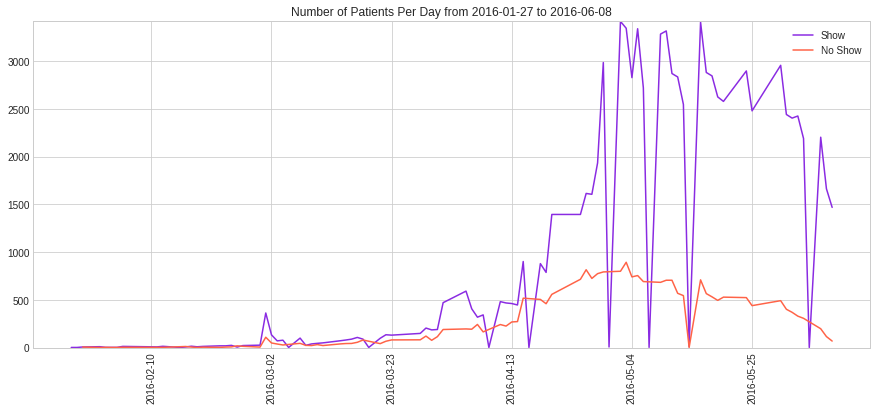

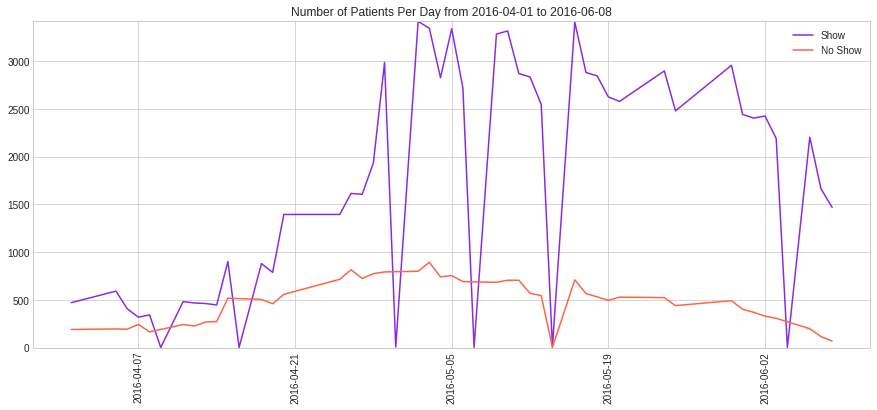

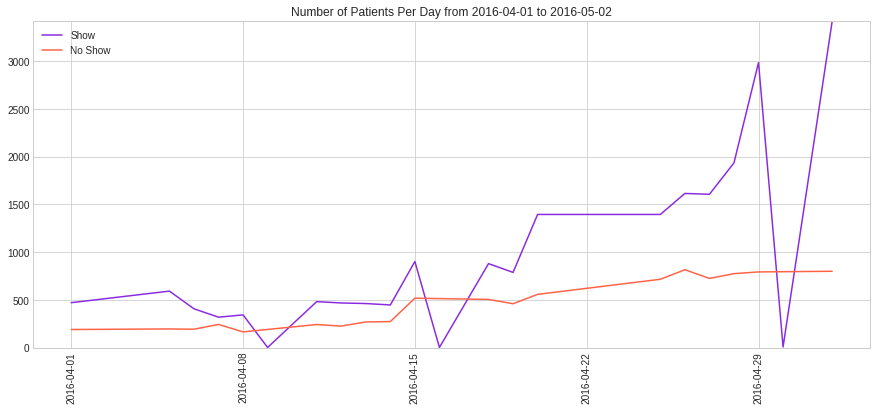

In [24]:
import datetime

def fct(start,end):
    count = df_people[(df_people['ScheduledDay'] >= start.date()) & (df_people['ScheduledDay'] <= end.date())].groupby(['No-show','ScheduledDay']).size()
    #print(count)
    count_no = count.Yes
    count_yes = count.No
    #print(count_no)
    #print(count_yes)
    if not count.empty:
        plt.rcParams['figure.figsize'] = [15, 6]
        plt.plot(count_yes.index, count_yes, color = 'blueviolet')
        plt.plot(count_no.index, count_no, color='tomato')
        plt.ylim(0, max(count_yes.max(),count_no.max()))
        plt.title('Number of Patients Per Day from {} to {}'.format(start.date(),end.date()))
        plt.xticks(rotation=90)
        plt.legend(['Show','No Show'])
        plt.show()
    #else:
     #   print('No Data To Show')
        
        
w=DateRangePicker(start='2015-11-10',end="2016-06-08",freq='D',fmt='%Y-%m-%d')
w.observe=fct
w.display()



The above visual, dynamically lets you drill up or down your data. As an example: I have drilled down my data from between 2016-01-27 and 2016-06-08 to 2016-04-01 and 2016-06-08 to 2016-04-01 and 2016-05-02. The plot has been kept bigger than normal to ensure that there are no overlapping dates in the y-axis. Although unchecked, I hope there is data available during all these dates as I have kept the slider from the maximum to the minimum dates in the data.

There is an obvious trend seen the the data that can be visualised using this tool i.e. for the first three months of 2016, very few patients visited the doctors or even did not visit the doctors. It is only in March that the number of patients increased reaching a high point of over 300. This has been further drilled down in the second graph and we can see as even though previously, I said that no patients visited on a sunday, it was not because there was a holiday or the doctor was not available. It is the patients themselves that skipped thier appointment. There is however, an exception during this graph i.e in the week from 12th May to 19th May 2019, we can see a point when there are no patients who visited but also, there were no patients who missed their appointments. 

The third graph is a further drill down of the second graph highlighting the month of April. This graphs reiterates the fact that appointments were scheduled on all days.

__Question 5__: How many scholarship students have visited the hospital? 

In [25]:
syes_show = len(df[(df['Scholarship'] == 1) & (df['No-show'] == 'No')])
syes_noshow = len(df[(df['Scholarship'] == 0) & (df['No-show'] == 'Yes')])

In [26]:
per_show = syes_show/ (syes_show + syes_noshow) *100
per_noshow = syes_noshow / (syes_show + syes_noshow) *100

string = ' <h3> {:0.2f}% : {:0.2f}% </h3>'.format(per_show, per_noshow)
display(Markdown(string))

 <h3> 29.57% : 70.43% </h3>

Oddly enough, 70% scholarship students did not go to the doctors in the last 2 years even though they receive concessions. There must be some other factors for 70% of the patients not visitng the docors which needs to be analysed. Can it be that healthcare is still a luxury for the patients even with the concession of a scholarship? What differences are there between the patients which go to the doctor and those which don't?

I have not used a visualisation here because of the fact that only one variable is being analysed. Also, the numbers are pretty straightforward so there is no need. 

__Question 6__: What are the neighbornoods who visit the doctor and what are those who dont?

In [27]:
counts = df.groupby(['Neighbourhood', 'No-show']).size().unstack(fill_value=0)
#calculating percentage to bring down everythiing to equal scale
counts['NoPer'] = round(counts['No']/(counts['No']+counts['Yes'])*100,2)
counts['YesPer'] = round(counts['Yes']/(counts['No']+counts['Yes'])*100,2)
counts.head()

No-show,No,Yes,NoPer,YesPer
Neighbourhood,,,,
AEROPORTO,7,1,87.50,12.50
ANDORINHAS,1740,518,77.06,22.94
ANTÔNIO HONÓRIO,220,50,81.48,18.52
ARIOVALDO FAVALESSA,220,61,78.29,21.71
BARRO VERMELHO,332,91,78.49,21.51


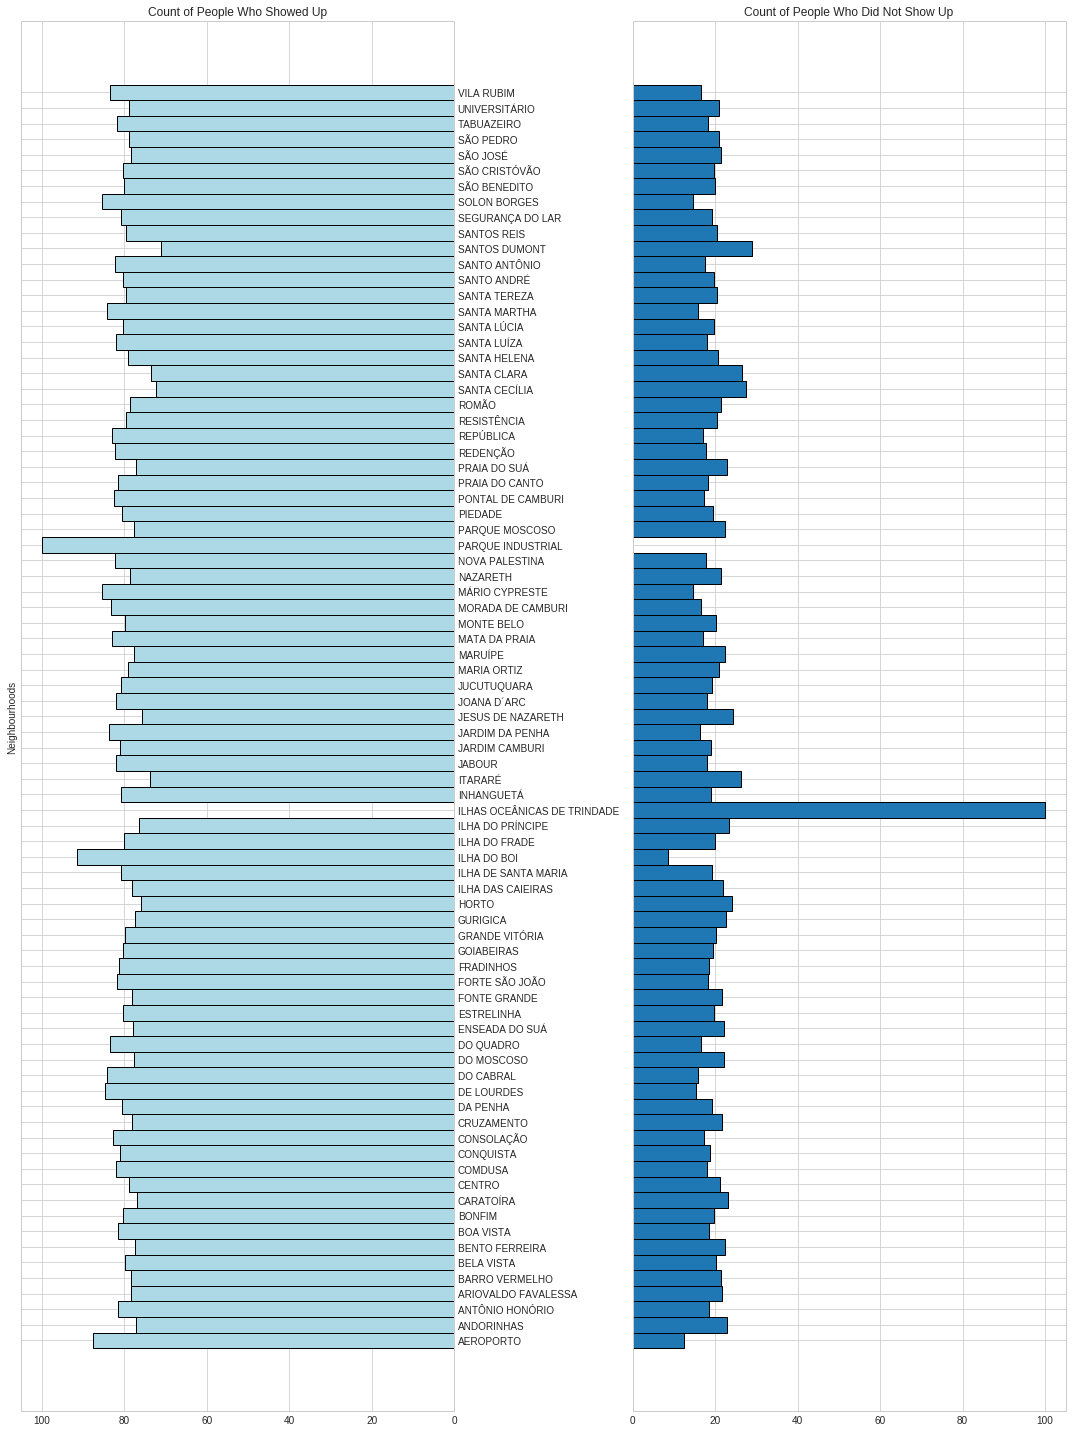

In [28]:
y = counts.index.values
x_yes = counts['NoPer']
x_no = counts['YesPer']

plt.rcParams['figure.figsize'] = [15, 20]
fig, ax = plt.subplots(ncols=2, sharey=True)
ax[0].barh(y, x_yes,color="lightblue", align='center', height=-1, edgecolor='black', linewidth=1.0)
ax[1].barh(y, x_no, align='center', height = -1, edgecolor='black', linewidth=1.0)

ax[0].invert_xaxis()
ax[0].yaxis.tick_right()

ax[0].set_ylabel('Neighbourhoods')
ax[0].set_title('Count of People Who Showed Up')
ax[1].set_title('Count of People Who Did Not Show Up')

plt.tight_layout()
plt.show()

At first I was plotting a population pyramind with the raw values for the above data. However, considering that the scales of the two data sets i.e yes and no are vastly different with max of the no dataset being over 6000 and the max of the Yes dataset being only 1400, the two plots did not share the same x-axis scale to warrent a comparision. Thus, I plotted this graph using percentages to show a trend of the neighbourhoods and bring the values to a single scale.

From the graph, it can be seen that the town of Parque Industrial has a 100% attendance rate based on the data set. This can imply either of two things: that there are no recorded instances of anyone missing their appointment in the town or that no one misses their appointments in Parque Industrial.The opposite of this is the neighbourhood of Ilhas Oceanicas De Trindad where 100% of the population has missed their appointments.

However, the normal scenario in almost all other cases is more than 70% of the Appointments made are kept by the patients while the rest are not, no matter the neighbourhood. 

__Question 7__:  What are the trends of Hypertension, Diabetes, Alcoholism and Handicap in the data?

In [29]:
hypertension = df[df['Hypertension']==1] 
diabetes = df[df['Diabetes'] ==1]
alcoholism = df[df['Alcoholism'] ==1]
handicap = df[df['Handicap'] == 1]

In [30]:
counts_h = hypertension.groupby(['ScheduledYear', 'ScheduledMonth']).size().reset_index()
counts_d = diabetes.groupby(['ScheduledYear', 'ScheduledMonth']).size().reset_index()
counts_a = alcoholism.groupby(['ScheduledYear', 'ScheduledMonth']).size().reset_index()
counts_ha = handicap.groupby(['ScheduledYear', 'ScheduledMonth']).size().reset_index()

counts_h['per'] = (counts_h[0]/counts_h[0].sum()) *100
counts_d['per'] = (counts_d[0]/counts_d[0].sum()) *100
counts_a['per'] = (counts_a[0]/counts_a[0].sum()) *100
counts_ha['per'] = (counts_ha[0]/counts_ha[0].sum()) *100

#since counts_a contains no value for 2015 Dec, it has to be manually added
#code from https://stackoverflow.com/questions/24284342/insert-a-row-to-pandas-dataframe
counts_a.loc[-1] = ['2015', '12', 0, 0.0]  # adding a row
counts_a.index = counts_a.index + 1  # shifting index
counts_a = counts_a.sort_index()  # sorting by index
counts_a

,ScheduledYear,ScheduledMonth,0,per
0,2015,12,0,0.000000
1,2016,1,3,0.089286
2,2016,2,4,0.119048
3,2016,3,44,1.309524
4,2016,4,604,17.976190
5,2016,5,2190,65.178571
6,2016,6,515,15.327381


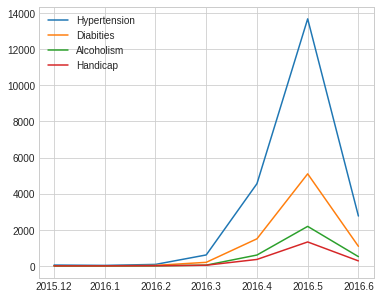

In [31]:
plt.rcParams['figure.figsize'] = [6, 5]
x = ['{}.{}'.format(year,month) for year,month in zip(counts_h['ScheduledYear'],counts_h['ScheduledMonth'])]

plt.plot(x,counts_h[0] )
plt.plot(x,counts_d[0])
plt.plot(x,counts_a[0])
plt.plot(x,counts_ha[0])

plt.legend(['Hypertension','Diabities','Alcoholism','Handicap'])
plt.show()

Once again, like the previous chart, I am comparing variables with non-similar ranges. Thus, I converted them to percentages again to bring everything to the range of 0-100. However, the resulting chart seems to follow the same trends in these months i.e almost 0 in December 2015 to increasing to an approx 65% peak and then a decline again to 15%.

However, when we change the scale by converting to percentages, there is some information removed so I plotted the chart with the orginale data points and I can see that there is an obvious difference in the numbers. While following a similar overall trend as before, I can see that hypertension patients are the maximum in number, followed by diabities patients, then alcoholism patients and finally handicap patients.

# Limitations

There are a few limitations of this project:
>-  There assumumption made in this project is that the data given is correct and true. Any changes to the data set might yeild different result.
>- The questions asked and analysed have been analysed from only one perspective. It can be possible that another analyst may come with different conclusions on the same dataset.
>- This data is biased in sense that there are almost a double number of women then men. If there was an equal number, then maybe the data might give different conclusions. There is no proof to say that more number of women in general visit the hospital except the numbers in this set. 

# Conclusion 

So a few conclusions that have come out of this analysis:
>-  In all cases, the number of people who keep thier appointment is far higher than the number of people who do not. However, we must not take the Noshow number very lightly. It is still a fair amount of patients not visiting the doctor and since I don't have any personal histories of the patients, the questions of why these appointments were skipped remains.
>- There is a large number of patients who are on scholarships and still skip there appointments. Once again, it is important to know the reason for this. 
